In [1]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns
from fim import arules

In [2]:
# load the main file
fact_table = pd.read_csv('fact_table.csv')

# Lets Explore and Understand the Data


In [3]:
# Sales Trends Over Time + line DONE
# product items
# top customers
# sales by location
# Payment Method Preferences
# Time of Day Analysis

In [4]:
fact_table

payment_key coustomer_key time_key item_key store_key  quantity   unit  \
0             P026       C004510  T049189   I00177    S00307         1     ct   
1             P022       C008967  T041209   I00248    S00595         1  rolls   
2             P030       C007261   T03633   I00195    S00496         8     ct   
3             P032       C007048  T084631   I00131     S0086         8     ct   
4             P014       C006430  T071276   I00050    S00488         8   cans   
...            ...           ...      ...      ...       ...       ...    ...   
999995        P010       C003726   T09247   I00063    S00502         5   cans   
999996        P021       C002581  T023483   I00252    S00225         1     ct   
999997        P035       C006133  T039372   I00119    S00555         7     ct   
999998        P031       C008735  T097975   I00257    S00440         2     ct   
999999        P032       C004067  T018028   I00044    S00326        10   cans   

        unit_price  total_price  
0             35.0         35.0  
1             26.0         26.0  
2             12.5        100.0  
3             14.0        112.0  
4              8.0         64.0  
...            ...          ...  
999995        40.0        200.0  
999996        11.0         11.0  
999997        53.0        371.0  
999998        21.0         42.0  
999999         8.0         80.0  

[1000000 rows x 9 columns]

In [5]:
#load the rest of the files 

In [6]:
item = pd.read_csv('item_dim.csv',  encoding='latin-1')

In [7]:
customer = pd.read_csv('customer_dim.csv', encoding='latin-1')

In [8]:
store = pd.read_csv('store_dim.csv', encoding='latin-1')

In [9]:
time_dim = pd.read_csv('time_dim.csv', encoding='latin-1')

In [10]:
trans = pd.read_csv('Trans_dim.csv', encoding='latin-1')

In [11]:
# and merge all tables
df = pd.merge(fact_table, time_dim, how='inner')

In [12]:
df = pd.merge(df, trans, how='inner')

In [13]:
df = pd.merge(df, store, how='inner')

In [14]:
df = pd.merge(df, item, how='inner')

In [15]:
df = pd.merge(df, customer, how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 28 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
 9   date           1000000 non-null  object 
 10  hour           1000000 non-null  int64  
 11  day            1000000 non-null  int64  
 12  week           1000000 non-null  object 
 13  month          1000000 non-null  int64  
 14  quarter        1000000 non-null  object 
 15  year           1000000 non-null  int64  
 16  trans_type     1000000 non-null  object 
 17  bank_name

In [16]:
df['desc'].unique()

array(['Food - Chocolate', 'Beverage - Energy/Protein', 'Food - Healthy',
       'Food - Snacks', 'Food - Sweets', 'a. Beverage - Soda',
       'Dishware - Plates', 'a. Beverage Sparkling Water',
       'Coffee Sweetener', 'Beverage Water', 'Kitchen Supplies',
       'Beverage - Iced Tea', 'Dishware - Cups Hot', 'Food - Chips',
       'Food - Nuts', 'Coffee K-Cups', 'Beverage - Gatorade',
       'Gum - Mints', 'Dishware - Bowls', 'Beverage - Juice',
       'Coffee Ground', 'Coffee Creamer', 'Coffee Hot Cocoa',
       'Coffee K-Cups Tea', 'Coffee Cream', 'Dishware - Utensils',
       'Dishware - Cups Cold', 'Medicine', 'Coffee Stirrers',
       'Beverage - Energy/Protein '], dtype=object)

In [17]:
df['total_price'].sum()

105401435.75

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
df[df['unit'].isnull()].sort_values('item_key')

payment_key coustomer_key time_key item_key store_key  quantity unit  \
111           P010       C006906  T066216   I00158    S00205         9  NaN   
676431        P015       C004741  T072396   I00158    S00490        11  NaN   
676432        P035       C004741  T091436   I00158     S0072         3  NaN   
676536        P004       C002987  T082826   I00158    S00390        11  NaN   
676644        P033       C005485  T093362   I00158     S0078         4  NaN   
...            ...           ...      ...      ...       ...       ...  ...   
335774        P031       C009132   T05058   I00158    S00623         2  NaN   
335775        P010       C009132   T08139   I00158    S00601         2  NaN   
335883        P010       C003670  T063103   I00158    S00548         2  NaN   
332821        P010       C006242  T044473   I00158    S00190         9  NaN   
962793        P032       C000322  T039324   I00158    S00291         7  NaN   

        unit_price  total_price                date  hour  day      week  \
111           17.0        153.0 2016-07-08 00:26:00     0    7  1st Week   
676431        17.0        187.0 2018-04-09 22:59:00    22    4  1st Week   
676432        17.0         51.0 2017-12-22 19:35:00    19   22  4th Week   
676536        17.0        187.0 2019-06-09 19:20:00    19    6  1st Week   
676644        17.0         68.0 2017-07-01 04:39:00     4    7  1st Week   
...            ...          ...                 ...   ...  ...       ...   
335774        17.0         34.0 2018-06-17 20:57:00    20   17  3rd Week   
335775        17.0         34.0 2017-02-15 10:37:00    10   15  3rd Week   
335883        17.0         34.0 2016-09-08 20:54:00    20    9  2nd Week   
332821        17.0        153.0 2015-07-18 21:52:00    21   18  3rd Week   
962793        17.0        119.0 2020-06-29 18:46:00    18   29  4th Week   

        month quarter  year trans_type  \
111         8      Q3  2016       card   
676431      9      Q3  2018       card   
676432     12      Q4  2017       card   
676536      9      Q3  2019       card   
676644      1      Q1  2017       card   
...       ...     ...   ...        ...   
335774      6      Q2  2018       card   
335775      2      Q1  2017       card   
335883      8      Q3  2016       card   
332821      7      Q3  2015       card   
962793      6      Q2  2020       card   

                                                bank_name    division  \
111                             Dutch-Bangla Bank Limited      KHULNA   
676431                            Mercantile Bank Limited  CHITTAGONG   
676432                                Uttara Bank Limited     RANGPUR   
676536                                  Bank Asia Limited       DHAKA   
676644                                 Trust Bank Limited     RANGPUR   
...                                                   ...         ...   
335774                             Southeast Bank Limited       DHAKA   
335775                          Dutch-Bangla Bank Limited       DHAKA   
335883                          Dutch-Bangla Bank Limited     BARISAL   
332821                          Dutch-Bangla Bank Limited      KHULNA   
962793  South Bangla Agriculture and Commerce Bank Lim...       DHAKA   

            district           upazila                   item_name  \
111           KHULNA          PHULTALA  Frito Bold Flavors Variety   
676431  KHAGRACHHARI           RAMGARH  Frito Bold Flavors Variety   
676432   LALMONIRHAT           PATGRAM  Frito Bold Flavors Variety   
676536       SHERPUR     SHERPUR SADAR  Frito Bold Flavors Variety   
676644    NILPHAMARI   SAIDPUR UPAZILA  Frito Bold Flavors Variety   
...              ...               ...                         ...   
335774         DHAKA            KAFRUL  Frito Bold Flavors Variety   
335775         DHAKA       DARUS SALAM  Frito Bold Flavors Variety   
335883    PATUAKHALI  PATUAKHALI SADAR  Frito Bold Flavors Variety   
332821     JHENAIDAH   JHENAIDAH SADAR  Frito Bold Flavors Vari

In [20]:
item[item['item_key'] == 'I00158']

item_key                   item_name          desc  unit_price  \
157   I00158  Frito Bold Flavors Variety  Food - Chips        17.0   

    man_country  supplier unit  
157   Lithuania  BIGSO AB  NaN

In [21]:
df['unit'].fillna('Frito Bold Flavors Variety', inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 28 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   payment_key    1000000 non-null  object        
 1   coustomer_key  1000000 non-null  object        
 2   time_key       1000000 non-null  object        
 3   item_key       1000000 non-null  object        
 4   store_key      1000000 non-null  object        
 5   quantity       1000000 non-null  int64         
 6   unit           1000000 non-null  object        
 7   unit_price     1000000 non-null  float64       
 8   total_price    1000000 non-null  float64       
 9   date           1000000 non-null  datetime64[ns]
 10  hour           1000000 non-null  int64         
 11  day            1000000 non-null  int64         
 12  week           1000000 non-null  object        
 13  month          1000000 non-null  int64         
 14  quarter        1000000 non-null  ob

# Customer Analysis

C:\Users\Nik\AppData\Local\Temp\ipykernel_8628\419261874.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('coustomer_key').sum().sort_values(['total_price'], ascending = False).head(10).plot(kind='bar',


<Axes: title={'center': 'Top 5'}, xlabel='coustomer_key'>

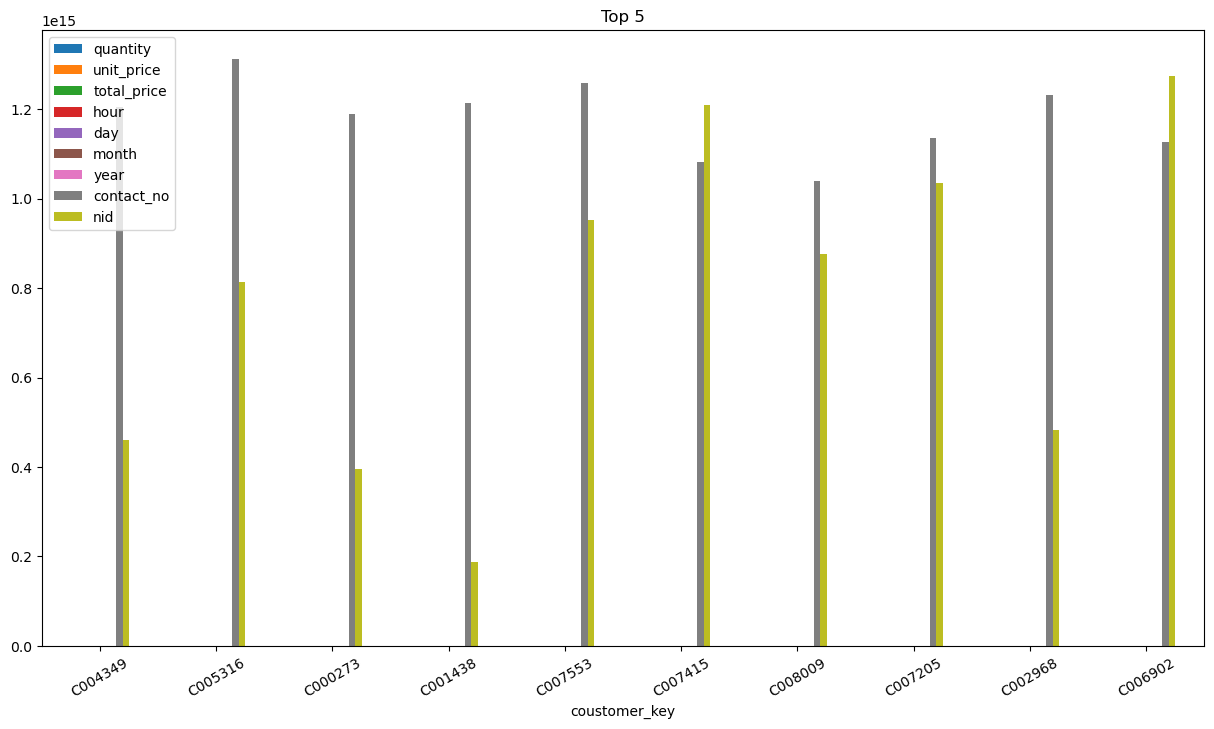

In [23]:
### Which customers give the highest sales?
df.groupby('coustomer_key').sum().sort_values(['total_price'], ascending = False).head(10).plot(kind='bar',
                                                                                                figsize=(15, 8),
                                                                                                rot=30,
                                                                                                title='Top 5')

### Which category gives the highest sales?

In [24]:
df.groupby('desc').count().sort_values(['coustomer_key'], ascending = False)['payment_key']

desc
a. Beverage - Soda             109741
Food - Healthy                 109585
Food - Chips                    79676
a. Beverage Sparkling Water     79353
Kitchen Supplies                72416
Food - Chocolate                52758
Beverage - Energy/Protein       49300
Food - Sweets                   41747
Beverage - Gatorade             37713
Beverage Water                  34173
Coffee Sweetener                30511
Gum - Mints                     30237
Beverage - Juice                26865
Coffee K-Cups                   26671
Beverage - Iced Tea             26517
Food - Nuts                     22846
Dishware - Cups Hot             22834
Coffee Cream                    22702
Dishware - Plates               22538
Food - Snacks                   18942
Coffee Ground                   18901
Dishware - Cups Cold            11369
Dishware - Utensils             11206
Coffee Hot Cocoa                 7585
Coffee Creamer                   7584
Medicine                         7575
Dishwar

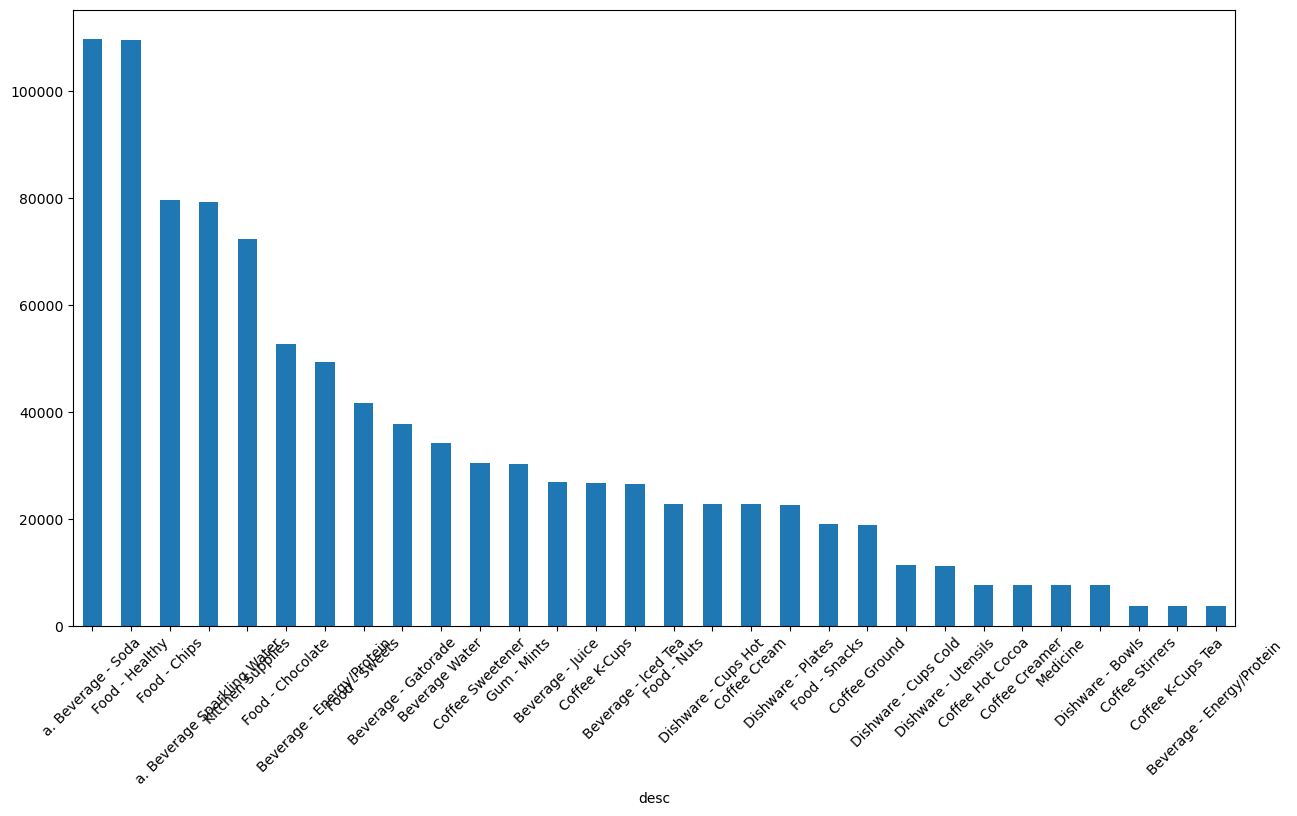

In [25]:
df.groupby('desc').count().sort_values(['coustomer_key'], ascending = False)['payment_key'].plot(kind='bar',
                                                    figsize=(15, 8),
                                                    rot=45)
None

In [26]:
df['desc'].unique()

array(['Food - Chocolate', 'Beverage - Energy/Protein', 'Food - Healthy',
       'Food - Snacks', 'Food - Sweets', 'a. Beverage - Soda',
       'Dishware - Plates', 'a. Beverage Sparkling Water',
       'Coffee Sweetener', 'Beverage Water', 'Kitchen Supplies',
       'Beverage - Iced Tea', 'Dishware - Cups Hot', 'Food - Chips',
       'Food - Nuts', 'Coffee K-Cups', 'Beverage - Gatorade',
       'Gum - Mints', 'Dishware - Bowls', 'Beverage - Juice',
       'Coffee Ground', 'Coffee Creamer', 'Coffee Hot Cocoa',
       'Coffee K-Cups Tea', 'Coffee Cream', 'Dishware - Utensils',
       'Dishware - Cups Cold', 'Medicine', 'Coffee Stirrers',
       'Beverage - Energy/Protein '], dtype=object)

In [27]:
def categorize_description(description):
    if pd.isna(description):
        return 'Other'
    description = description.lower()
    if 'food' in description:
        return 'Food'
    elif 'coffee' in description:
        return 'Coffee'
    elif 'beverage' in description:
        return 'Beverage'
    elif 'dishware' in description:
        return 'Dishware'
    else:
        return description

    
df['categories'] = df['desc'].apply(categorize_description)


df

payment_key coustomer_key time_key item_key store_key  quantity  \
0             P026       C004510  T049189   I00177    S00307         1   
1             P001       C004510  T082988   I00062    S00428        11   
2             P018       C004510  T074754   I00196    S00378         8   
3             P011       C004510   T06276   I00223    S00367         8   
4             P034       C004510   T08402   I00229    S00535         9   
...            ...           ...      ...      ...       ...       ...   
999995        P034       C007559   T08219   I00088    S00266         8   
999996        P037       C007559  T054928   I00018    S00247         1   
999997        P011       C007559  T041472   I00018    S00272         2   
999998        P005       C007559  T043747   I00262    S00541        11   
999999        P005       C007559  T064421   I00091    S00193         4   

           unit  unit_price  total_price                date  hour  day  \
0            ct       35.00        35.00 2016-04-26 17:13:00    17   26   
1          cans       37.00       407.00 2018-11-05 07:18:00     7   11   
2            ct       16.00       128.00 2015-11-29 10:19:00    10   29   
3            ct       13.50       108.00 2016-11-10 23:06:00    23   11   
4            ct       13.00       117.00 2017-10-17 23:17:00    23   17   
...         ...         ...          ...                 ...   ...  ...   
999995  bottles       17.00       136.00 2020-07-22 07:42:00     7   22   
999996     cans        6.75         6.75 2020-07-18 06:23:00     6   18   
999997     cans        6.75        13.50 2019-12-20 09:44:00     9   20   
999998       ct       14.00       154.00 2015-04-16 03:35:00     3   16   
999999  bottles        7.50        30.00 2018-03-11 00:16:00     0    3   

            week  month quarter  year trans_type                   bank_name  \
0       4th Week      4      Q2  2016       card        Premier Bank Limited   
1       2nd Week      5      Q2  2018       cash                        None   
2       4th Week     11      Q4  2015       card   Mutual Trust Bank Limited   
3       2nd Week     10      Q4  2016       card        Eastern Bank Limited   
4       3rd Week     10      Q4  2017       card  United Commercial Bank Ltd   
...          ...    ...     ...   ...        ...                         ...   
999995  4th Week      7      Q3  2020       card  United Commercial Bank Ltd   
999996  3rd Week      7      Q3  2020     mobile                       Bkash   
999997  3rd Week     12      Q4  2019       card        Eastern Bank Limited   
999998  3rd Week      4      Q2  2015       card           BRAC Bank Limited   
999999  1st Week     11      Q4  2018       card           BRAC Bank Limited   

          division    district    upazila  \
0            DHAKA    JAMALPUR   ISLAMPUR   
1       CHITTAGONG  CHITTAGONG    ANOWARA   
2            DHAKA     RAJBARI  KALUKHALI   
3            DHAKA   NETRAKONA   BARHATTA   
4          BARISAL       BHOLA   LALMOHAN   
...            ...         ...        ...   
999995       DHAKA       DHAKA    PALLABI   
999996       DHAKA       DHAKA   GENDARIA   
999997       DHAKA       DHAKA      SAVAR   
999998     BARISAL   JHALOKATI    RAJAPUR   
999999      KHULNA   JHENAIDAH  MAHESHPUR   

                                  item_name                       desc  \
0                   M&M Peanut Candy 1.7 oz           Food - Chocolate   
1                             Red Bull 16oz  Beverage - Energy/Protein   
2       Fiber One 90 Calorie Fudge Brownies             Food - Healthy   
3              Lance Variety Cracker Packs               Food - Snacks   
4        Kellogg's Cereals Assortment Pack               Food - Sweets   
...                                     ...                        ...   
999995      Welch's 100% Juice Variety10 oz           Beverage - Juice   
999996         Fresca Original - 12 oz cans         a. Beverage - Soda   
999997         Fresca Original - 12 oz cans      

In [28]:
df['categories'].unique()

array(['Food', 'Beverage', 'Dishware', 'Coffee', 'kitchen supplies',
       'gum - mints', 'medicine'], dtype=object)

# Which are the top five states that generate the highest revenue?


# Which countries are the highest in terms of revenue?

In [29]:
df.groupby('man_country').count().sort_values(by='total_price', ascending = False)['total_price']

man_country
Bangladesh       128655
India            121639
Germany          116694
poland           106056
Finland          101953
Lithuania         98539
Netherlands       98453
Cambodia          91413
United States     76020
China             60578
Name: total_price, dtype: int64

In [30]:
# Which countries are the highest in terms of revenue?

In [31]:
df.groupby(['man_country','supplier']).count().sort_values(by='total_price', ascending = False)['total_price']


man_country    supplier                      
Bangladesh     DENIMACH LTD                      128655
India          Indo Count Industries Ltd         121639
Germany        Friedola 1888 GmbH                116694
poland         CHROMADURLIN S.A.S                106056
Finland        HARDFORD AB                       101953
Lithuania      BIGSO AB                           98539
Netherlands    Bolsius Boxmeer                    98453
Cambodia       NINGBO SEDUNO IMP & EXP CO.LTD     91413
United States  MAESA SAS                          76020
China          CHERRY GROUP CO.,LTD               60578
Name: total_price, dtype: int64

# RFM Analysis

In [32]:
# create time_difference to capture part of data below
df["time_difference"] = df['date'].max() - df["date"]

In [33]:
#last two years
df["last_two_years"] = df["time_difference"] <= timedelta(days=2*365)

In [34]:
df_RFM = df[df['last_two_years']==True].copy()

In [35]:
df_RFM['Recency'] = (df_RFM['date'].max() - df_RFM['date']).dt.days


In [36]:
df_RFM.head()

payment_key coustomer_key time_key item_key store_key  quantity     unit  \
7         P039       C004510  T068435   I00141    S00591        11       ct   
28        P017       C004510  T068492   I00199    S00321        10       ct   
29        P018       C004510  T034129   I00194     S0039         7     bars   
35        P022       C004510  T034101   I00139    S00272         3       ct   
45        P010       C004510   T02137   I00042     S0084         7  bottles   

    unit_price  total_price                date  hour  day      week  month  \
7         18.0        198.0 2020-07-11 20:41:00    20    7  1st Week     11   
28        15.0        150.0 2020-08-22 12:23:00    12   22  4th Week      8   
29        23.0        161.0 2021-09-01 18:02:00    18    9  2nd Week      1   
35        24.0         72.0 2020-07-07 22:24:00    22    7  1st Week      7   
45        28.0        196.0 2020-12-18 15:32:00    15   18  3rd Week     12   

   quarter  year trans_type                  bank_name division     district  \
7       Q4  2020     mobile                      Nagad    DHAKA        DHAKA   
28      Q3  2020       card     Modhumoti Bank Limited    DHAKA  KISHOREGONJ   
29      Q1  2021       card  Mutual Trust Bank Limited  RANGPUR     DINAJPUR   
35      Q3  2020       card    NRB Commercial Bank Ltd    DHAKA        DHAKA   
45      Q4  2020       card  Dutch-Bangla Bank Limited  RANGPUR      RANGPUR   

         upazila                       item_name                         desc  \
7   BIMAN BANDAR  Hefty Cmprtmnt Plates Foam 10'            Dishware - Plates   
28     MITHAMAIN         Kellogg's Fruity Snacks               Food - Healthy   
29      BIRAMPUR  Detour Lower Sugar Protein Bar               Food - Healthy   
35         SAVAR     Foam Coffee Cups - 16 ounce          Dishware - Cups Hot   
45     BADARGANJ          Topo Chico 12 oz glass  a. Beverage Sparkling Water   

      man_country                        supplier   name     contact_no  \
7        Cambodia  NINGBO SEDUNO IMP & EXP CO.LTD  priya  8801529462805   
28      Lithuania                        BIGSO AB  priya  8801529462805   
29    Netherlands                 Bolsius Boxmeer  priya  8801529462805   
35        Germany              Friedola 1888 GmbH  priya  8801529462805   
45  United States                       MAESA SAS  priya  8801529462805   

              nid categories   time_difference  last_two_years  Recency  
7   4543429591184   Dishware 508 days 02:17:00            True      508  
28  4543429591184       Food 466 days 10:35:00            True      466  
29  4543429591184       Food  91 days 04:56:00            True       91  
35  4543429591184   Dishware 512 days 00:34:00            True      512  
45  4543429591184   Beverage 348 days 07:26:00            True      348

### Using group by for each customer we need we create three now columns as following

 -Recency: for each customer snapshot date – latest purchase difference in days
 
 -Frequency: for each customer count of how many invoices are issued for him
 
 -Monetary Value: for each customer sum of amount spent

In [37]:
df_RFM = df_RFM.groupby(['coustomer_key']).agg({'Recency': np.min,
                                           'date':pd.Series.nunique,
                                           'total_price':np.sum}).reset_index()

df_RFM

coustomer_key  Recency  date  total_price
0          C000001        0     6       635.75
1          C000002      360    13      1134.25
2          C000003      398     8       669.25
3          C000004      345    17      1225.25
4          C000005      373    14      1427.75
...            ...      ...   ...          ...
9186       C009187      340    25      3024.25
9187       C009188      338    25      3152.00
9188       C009189      313    17      1424.00
9189       C009190      366    16      1898.75
9190       C009191       30    20      1930.00

[9191 rows x 4 columns]

In [38]:
#Rename columns
df_RFM.rename(columns={'Recency':'Recency','date':'Frequency','total_price':'Monetary'},inplace= True)

df_RFM

coustomer_key  Recency  Frequency  Monetary
0          C000001        0          6    635.75
1          C000002      360         13   1134.25
2          C000003      398          8    669.25
3          C000004      345         17   1225.25
4          C000005      373         14   1427.75
...            ...      ...        ...       ...
9186       C009187      340         25   3024.25
9187       C009188      338         25   3152.00
9188       C009189      313         17   1424.00
9189       C009190      366         16   1898.75
9190       C009191       30         20   1930.00

[9191 rows x 4 columns]

### We have now calculated our values. But those aggregations are absolut and hard to explain as is. It is better to normalize our scores replacing those values with relative once with respect to the distribution

### Pandas qcut splits numeric columns into quartiles.

### For Recency and Frequency columns, the higher values (top quartile) are assigned with indicator 4 and lowest to 1. Higher values imply that customers have spent more money to our products or bought more often and the 1-4 score is assigned accordingly

### The opposite logic is applied for recency as higher values mean that many days have passed since last purchase. Thus, customers with high values (top quartile) take score 1 and those with the smallest values 4.

In [39]:
# Create Scores RFM scores based on quantiles of distribution

#Date from customer's last purchase.The nearest date gets 4 and the furthest date gets 1.
df_RFM["recency_score"] = pd.qcut(df_RFM['Recency'].rank(method="first"),
                                  4,
                                  labels=[4, 3, 2, 1])

# Total number of purchases.The least frequency gets 1 and the maximum frequency gets 4.
df_RFM["frequency_score"] = pd.qcut(df_RFM["Frequency"].rank(method="first"),
                                    4,
                                    labels=[1, 2, 3, 4])

#Total spend by the customer.The least money gets 1, the most money gets 4.
df_RFM["monetary_score"] = pd.qcut(df_RFM["Monetary"].rank(method="first"),
                                   4,
                                   labels=[1, 2, 3, 4])

df_RFM.head()

coustomer_key  Recency  Frequency  Monetary recency_score frequency_score  \
0       C000001        0          6    635.75             4               1   
1       C000002      360         13   1134.25             1               1   
2       C000003      398          8    669.25             1               1   
3       C000004      345         17   1225.25             2               2   
4       C000005      373         14   1427.75             1               1   

  monetary_score  
0              1  
1              1  
2              1  
3              1  
4              1

## Calculate total RFM score for each customer


In [40]:
df_RFM["RFM_Segment"] = df_RFM["recency_score"].astype(str) + df_RFM[
    "frequency_score"].astype(str) + df_RFM["monetary_score"].astype(str)

df_RFM['RFM_Score'] = df_RFM[[
    'recency_score', 'frequency_score', 'monetary_score'
]].sum(axis=1)
df_RFM.head()

coustomer_key  Recency  Frequency  Monetary recency_score frequency_score  \
0       C000001        0          6    635.75             4               1   
1       C000002      360         13   1134.25             1               1   
2       C000003      398          8    669.25             1               1   
3       C000004      345         17   1225.25             2               2   
4       C000005      373         14   1427.75             1               1   

  monetary_score RFM_Segment  RFM_Score  
0              1         411          6  
1              1         111          3  
2              1         111          3  
3              1         221          5  
4              1         111          3

### Split customers to segments and give indicative names (labeling appoaches may vary for this step)


In [41]:
segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}
df_RFM['Segment_labels'] = df_RFM['RFM_Segment']
df_RFM['Segment_labels'] = df_RFM['Segment_labels'].replace(segt_map, regex=True)
df_RFM.head()

coustomer_key  Recency  Frequency  Monetary recency_score frequency_score  \
0       C000001        0          6    635.75             4               1   
1       C000002      360         13   1134.25             1               1   
2       C000003      398          8    669.25             1               1   
3       C000004      345         17   1225.25             2               2   
4       C000005      373         14   1427.75             1               1   

  monetary_score RFM_Segment  RFM_Score   Segment_labels  
0              1         411          6          Low New  
1              1         111          3  Need Activation  
2              1         111          3  Need Activation  
3              1         221          5        Low Loyal  
4              1         111          3  Need Activation

In [42]:
seg_pareto = df_RFM.groupby(["Segment_labels"]).agg({'Monetary': np.sum,
                 
                                                           "coustomer_key": pd.Series.nunique}).reset_index()

seg_pareto

Segment_labels    Monetary  coustomer_key
0         High Loyal   871837.00            430
1           High New  1108148.50            560
2     High Promising  1649330.50            817
3          Low Loyal  1284312.50           1078
4            Low New   535653.25            445
5       Medium Loyal   345367.00            207
6         Medium New  1733744.50           1067
7   Medium Potential   672448.50            401
8    Need Activation  2903612.50           1888
9         Top Recent  1615442.00            631
10      Top at Risk   1055017.75            410
11               VIP  3317708.50           1257

In [43]:
seg_pareto["Monetary%"] = seg_pareto["Monetary"]/seg_pareto["Monetary"].sum()
seg_pareto = seg_pareto.sort_values(by=['Monetary%'], ascending=False)
seg_pareto["CumulativePercentage"] = (seg_pareto["Monetary"].cumsum()/ 
                                      seg_pareto["Monetary"].sum()*100).round(2)
seg_pareto["CumulativeSum"] = (seg_pareto["coustomer_key"].cumsum()/ 
                                      seg_pareto["coustomer_key"].sum()*100).round(2)

seg_pareto.reset_index()

index    Segment_labels    Monetary  coustomer_key  Monetary%  \
0      11               VIP  3317708.50           1257   0.194102   
1       8   Need Activation  2903612.50           1888   0.169875   
2       6        Medium New  1733744.50           1067   0.101432   
3       2    High Promising  1649330.50            817   0.096494   
4       9        Top Recent  1615442.00            631   0.094511   
5       3         Low Loyal  1284312.50           1078   0.075138   
6       1          High New  1108148.50            560   0.064832   
7      10      Top at Risk   1055017.75            410   0.061724   
8       0        High Loyal   871837.00            430   0.051007   
9       7  Medium Potential   672448.50            401   0.039341   
10      4           Low New   535653.25            445   0.031338   
11      5      Medium Loyal   345367.00            207   0.020206   

    CumulativePercentage  CumulativeSum  
0                  19.41          13.68  
1                  36.40          34.22  
2                  46.54          45.83  
3                  56.19          54.72  
4                  65.64          61.58  
5                  73.16          73.31  
6                  79.64          79.40  
7                  85.81          83.86  
8                  90.91          88.54  
9                  94.85          92.91  
10                 97.98          97.75  
11                100.00         100.00

# Market Basket Analysis


## Association Rules


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column           Non-Null Count    Dtype          
---  ------           --------------    -----          
 0   payment_key      1000000 non-null  object         
 1   coustomer_key    1000000 non-null  object         
 2   time_key         1000000 non-null  object         
 3   item_key         1000000 non-null  object         
 4   store_key        1000000 non-null  object         
 5   quantity         1000000 non-null  int64          
 6   unit             1000000 non-null  object         
 7   unit_price       1000000 non-null  float64        
 8   total_price      1000000 non-null  float64        
 9   date             1000000 non-null  datetime64[ns] 
 10  hour             1000000 non-null  int64          
 11  day              1000000 non-null  int64          
 12  week             1000000 non-null  object         
 13  month            1000000 non-null  int64   

## 1 - Produce an Association Rules Report which will show the below measures: 
### support itemset absolute, support itemset relative pct, confidence pct and lift

In [45]:
# inputs
supp = 5  # minimum support of an assoc. rule (default: 10)
conf = 30  # minimum confidence of an assoc. rule (default: 80%)
zmin = 2
zmax = 3
report = 'aSCl'

In [46]:
report_colnames = {
    'a': 'support_itemset_absolute',
    's': 'support_itemset_relative',
    'S': 'support_itemset_relative_pct',
    'b': 'support_bodyset_absolute',
    'x': 'support_bodyset_relative',
    'X': 'support_bodyset_relative_pct',
    'h': 'support_headitem_absolute',
    'y': 'support_headitem_relative',
    'Y': 'support_headitem_relative_pct',
    'c': 'confidence',
    'C': 'confidence_pct',
    'l': 'lift',
    'L': 'lift_pct',
    'e': 'evaluation',
    'E': 'evaluation_pct',
    'Q': 'support of the empty set (total number of transactions)'
    }

In [47]:
cust_prod=df.groupby('coustomer_key')['item_name'].apply(list)
cust_prod

coustomer_key
C000001    [Vita Coconut Water 10oz , Frito Big Grab Vari...
C000002    [M&M Peanut Candy 1.7 oz, Fiber One 90 Calorie...
C000003    [Frito Big Grab Variety 1.5-2.0 oz, Red Bull 1...
C000004    [Frito Big Grab Variety 1.5-2.0 oz, French Van...
C000005    [Vita Coconut Water 10oz , Red Bull 16oz, Mons...
                                 ...                        
C009187    [Red Bull 16oz, Frito Bold Flavors Variety, La...
C009188    [Kleenex Tissue Rectangle Boxes 160/box, Honey...
C009189    [Red Bull 16oz, Red Bull 16oz, Monster Zero Ul...
C009190    [M&M Peanut Candy 1.7 oz, Vita Coconut Water 1...
C009191    [Frito Big Grab Variety 1.5-2.0 oz, Frito Big ...
Name: item_name, Length: 9191, dtype: object

In [48]:
# Create list of lists to pass it into PyFim

cust_prod_list=cust_prod.to_list()
cust_prod_list

[['Vita Coconut Water 10oz ',
  'Frito Big Grab Variety 1.5-2.0 oz',
  'Red Bull 16oz',
  'Kleenex Tissue Rectangle Boxes 160/box',
  'Honey Packets  ',
  'Dixie Perfecttouch Paper Cups 12oz',
  "Kellogg's Cereals Assortment Pack ",
  "Hefty Cmprtmnt Plates Foam 10'",
  'Topo Chico 20oz plastic',
  'Sprite - 12 oz cans',
  'Clear Plastic Cups 9oz',
  'Lunchables Variety Pack Oscar Meyer',
  'Snapple Variety Pack 20oz',
  'Cliff Energy Bars Variety Pack',
  'Pop-Tarts, Frosted Strawberry',
  'Gatorade Zero Variety 20 oz',
  'Gatorade Zero Variety 20 oz',
  'Peanutbutter Filled Pretzels',
  'Cascade Gel w/ Dawn Dishwasher',
  'Hershey Kisses ',
  "Barq's Root Beer - 12 oz cans",
  "Barq's Root Beer - 12 oz cans",
  'Ozarka Spring Water 20 oz',
  'Jolly Ranchers Variety Hard Candy',
  'Famous Amos Cookies ',
  'Cherry Coke Zero 12 pack',
  'Gatorade Liberty Variety 12 oz',
  'Sugar in the Raw Packets',
  'Frito Classic Mix Variety',
  'Foam Coffee Cups - 16 ounce',
  'La Croix Sparkling G

In [49]:
# Run apriori algorithm to creeate associations
apriori = arules(cust_prod_list, supp=supp, conf=conf, report=report,eval='lift', zmin = 2,zmax = 2)

In [50]:
#Uncomment and run in case you want to see parameters of association rules
#??arules 


#Creat dataframe wiht columns based on the report variables and sorted based on the "Associations_Sorted_based_on"
colnames = ['Cons_Product', 'antecedent'] + [report_colnames.get(k, k) for k in list(report)]
df_rules = pd.DataFrame(apriori, columns=colnames)
df_rules = df_rules.sort_values(report_colnames["a"], ascending=False)

#Change order of columns antecedent and consequent
df_rules = df_rules[['antecedent', 'Cons_Product']+ [report_colnames.get(k, k) for k in list(report)]]


#Print the numbers of rules created
print(df_rules.shape)

#Print top 10 and last 10 rules (the last 10 will be shown)
df_rules

(66822, 6)


antecedent  \
0                            (Pepsi - 12 oz cans,)   
1                           (Sprite - 12 oz cans,)   
8           (Muscle Milk Protein Shake Van. 11oz,)   
9                            (Pepsi - 12 oz cans,)   
10          (Muscle Milk Protein Shake Van. 11oz,)   
...                                            ...   
66279  (Goldfish Variety Bags, cheddar, pretzels,)   
64697        (Dixie Perfecttouch Paper Cups 12oz,)   
64696             (Dole Fruit in Gel Cups 4.3 oz,)   
65250                     (Monster Lo-Carb 16 oz,)   
65251               (Hawaiian Punch - 12 oz cans,)   

                              Cons_Product  support_itemset_absolute  \
0                      Sprite - 12 oz cans                      2981   
1                       Pepsi - 12 oz cans                      2981   
8                       Pepsi - 12 oz cans                      2921   
9      Muscle Milk Protein Shake Van. 11oz                      2921   
10                 Coke Classic 12 oz cans                      2915   
...                                    ...                       ...   
66279     Hefty Supreme Foam Plates 6 inch                       942   
64697        Dole Fruit in Gel Cups 4.3 oz                       936   
64696   Dixie Perfecttouch Paper Cups 12oz                       936   
65250          Hawaiian Punch - 12 oz cans                       936   
65251                Monster Lo-Carb 16 oz                       936   

       support_itemset_relative_pct  confidence_pct      lift  
0                         32.433903       57.348980  1.012475  
1                         32.433903       57.260853  1.012475  
8                         31.781090       57.039641  1.008564  
9                         31.781090       56.194690  1.008564  
10                        31.715809       56.922476  1.018047  
...                             ...             ...       ...  
66279                     10.249157       31.099373  0.952781  
64697                     10.183876       30.578242  0.931846  
64696                     10.183876       31.034483  0.931846  
65250                     10.183876       31.075697  0.941387  
65251                     10.183876       30.850363  0.941387  

[66822 rows x 6 columns]

## 2 - Find the Top Association in terms of Support Absolute, confidence and lift and provide an interpretation of your results for these product relations

## Top Association in terms of lift

In [51]:
# lift - How many times more propable is a customer to buy Y after he has bought X, 
# in comparison to any other random customer

df_rules = df_rules.sort_values(by='lift', ascending=False)
df_rules.head(10)

antecedent  \
14873             (Cliff Energy Bars Variety Pack,)   
14872                (Altoids Small Packs Variety,)   
50886          (Belvita Protein Oats Soft Biscuit,)   
50887                    (Topo Chico 20oz plastic,)   
62128            (Belvita Hard Biscuits Blueberry,)   
62129  (Sargento Bal. Breaks (fruit, nut, cheese),)   
9164                   (Charmin Ultra Bath Tissue,)   
9165                          (Miss Vickies Chips,)   
46623          (Jolly Ranchers Variety Hard Candy,)   
46622     (Kleenex Tissue Rectangle Boxes 160/box,)   

                                    Cons_Product  support_itemset_absolute  \
14873                Altoids Small Packs Variety                      1148   
14872             Cliff Energy Bars Variety Pack                      1148   
50886                    Topo Chico 20oz plastic                      1137   
50887          Belvita Protein Oats Soft Biscuit                      1137   
62128  Sargento Bal. Breaks (fruit, nut, cheese)                      1090   
62129            Belvita Hard Biscuits Blueberry                      1090   
9164                          Miss Vickies Chips                      1156   
9165                   Charmin Ultra Bath Tissue                      1156   
46623     Kleenex Tissue Rectangle Boxes 160/box                      1117   
46622          Jolly Ranchers Variety Hard Candy                      1117   

       support_itemset_relative_pct  confidence_pct      lift  
14873                     12.490480       36.630504  1.083937  
14872                     12.490480       36.960721  1.083937  
50886                     12.370798       37.193327  1.078032  
50887                     12.370798       35.856197  1.078032  
62128                     11.859428       35.997358  1.076641  
62129                     11.859428       35.470225  1.076641  
9164                      12.577521       37.122672  1.076323  
9165                      12.577521       36.466877  1.076323  
46623                     12.153193       35.824246  1.075312  
46622                     12.153193       36.479425  1.075312

### High Lift: A lift value greater than 1 indicates that the presence of one product increases the likelihood of the other being purchased.

### Lift just slightly higher than 1 suggests a slightly higher chance than random

## Top Association in terms of support relative percentage

In [52]:
# support - How many times do we find X and Y together in general

df_rules = df_rules.sort_values(by='support_itemset_relative_pct', ascending=False)
df_rules.head(10)

antecedent  \
0                    (Pepsi - 12 oz cans,)   
1                   (Sprite - 12 oz cans,)   
9                    (Pepsi - 12 oz cans,)   
8   (Muscle Milk Protein Shake Van. 11oz,)   
10  (Muscle Milk Protein Shake Van. 11oz,)   
11              (Coke Classic 12 oz cans,)   
14               (Diet Coke - 12 oz cans,)   
15                   (Pepsi - 12 oz cans,)   
12               (Diet Coke - 12 oz cans,)   
13                  (Sprite - 12 oz cans,)   

                           Cons_Product  support_itemset_absolute  \
0                   Sprite - 12 oz cans                      2981   
1                    Pepsi - 12 oz cans                      2981   
9   Muscle Milk Protein Shake Van. 11oz                      2921   
8                    Pepsi - 12 oz cans                      2921   
10              Coke Classic 12 oz cans                      2915   
11  Muscle Milk Protein Shake Van. 11oz                      2915   
14                   Pepsi - 12 oz cans                      2911   
15               Diet Coke - 12 oz cans                      2911   
12                  Sprite - 12 oz cans                      2910   
13               Diet Coke - 12 oz cans                      2910   

    support_itemset_relative_pct  confidence_pct      lift  
0                      32.433903       57.348980  1.012475  
1                      32.433903       57.260853  1.012475  
9                      31.781090       56.194690  1.008564  
8                      31.781090       57.039641  1.008564  
10                     31.715809       56.922476  1.018047  
11                     31.715809       56.723098  1.018047  
14                     31.672288       57.044876  1.008656  
15                     31.672288       56.002309  1.008656  
12                     31.661408       57.025279  1.006760  
13                     31.661408       55.897042  1.006760

## Frequently bought together

Sprite & Pepsi: This pair is often bought together, showing a pattern.

Pepsi & Muscle Milk: Same applies in this pair also.

## Top Association in terms of confidence

In [53]:
# how many time do we find X given that a customer has already bought Y

df_rules = df_rules.sort_values(by='confidence_pct', ascending=False)
df_rules.head(6)

antecedent            Cons_Product  \
47308               (Clear Plastic 12 oz Cups,)      Pepsi - 12 oz cans   
9312      (Tropicana Orange Juice 10 oz 100% ,)     Sprite - 12 oz cans   
56884  (Coffee-mate Original Powdered Creamer,)      Pepsi - 12 oz cans   
1122                 (Gatorade Variety 20 oz ,)     Sprite - 12 oz cans   
49070           (Gatorade Frost Variety 12 oz,)  Diet Coke - 12 oz cans   
11344      (Crunchy Granola Bars Oats & Honey,)      Pepsi - 12 oz cans   

       support_itemset_absolute  support_itemset_relative_pct  confidence_pct  \
47308                      1799                     19.573496       58.829300   
9312                       1827                     19.878142       58.520179   
56884                      1775                     19.312371       58.407371   
1122                       1844                     20.063105       58.391387   
49070                      1783                     19.399412       58.363339   
11344                      1818                     19.780220       58.362761   

           lift  
47308  1.040208  
9312   1.033152  
56884  1.032747  
1122   1.030878  
49070  1.051181  
11344  1.031959

### When the antecedent is purchased, there’s a strong likelihood the consequent will be purchased as well

Cups & Pepsi: Shows a strong likelihood (nearly 59%) that if a customer buys plastic cups, they’ll also buy Pepsi.

Tropicana & Sprite: Similarly, customers buying Tropicana Orange Juice are also likely to buy Sprite.

Coffee-mate & Pepsi: Indicates a strong preference for buying creamer and Pepsi together.

## 3 - Is there product cannibalization between products? If yes, provide for which products. If not, support your statement.

In [54]:
df_rules = df_rules.sort_values(by='lift', ascending=True)
df_rules.head(5)

antecedent                   Cons_Product  \
53815  (Gatorade Frost Variety 20 oz ,)             K Cups - Green Tea   
53814             (K Cups - Green Tea,)  Gatorade Frost Variety 20 oz    
40027         (Pop Chips Variety bags,)   Folgers Classic Roast Coffee   
40026   (Folgers Classic Roast Coffee,)         Pop Chips Variety bags   
25825          (Starbuck's Pike Place,)   Ozarka Spring Water Mini 8oz   

       support_itemset_absolute  support_itemset_relative_pct  confidence_pct  \
53815                       947                     10.303558       30.420816   
53814                       947                     10.303558       31.069554   
40027                       962                     10.466761       30.872914   
40026                       962                     10.466761       31.284553   
25825                       981                     10.673485       31.024668   

           lift  
53815  0.917315  
53814  0.917315  
40027  0.922774  
40026  0.922774  
25825  0.922808

### No strong evidence of Cannibalization: 
The lift values below 1 indicate these products do not significantly affect each other's sales, 

but there isn't notable cannibalization happening between these products